The task is to predict the price of Bitcoin for the next 5 periods:
 - get the data (from Yahoo Finance, BTC-USD). We are interested in all available data, Close price, daily

In [110]:
import yfinance

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [111]:
btc = pd.read_csv(r'C:/Users/olivi/Downloads/BTC-USD.csv')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
1,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
3,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
4,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344


In [112]:
btc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
456,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
457,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
458,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
459,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
460,2022-04-05,46594.121094,47090.136719,45659.996094,45970.082031,45970.082031,31392157696


In [113]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       461 non-null    object 
 1   Open       461 non-null    float64
 2   High       461 non-null    float64
 3   Low        461 non-null    float64
 4   Close      461 non-null    float64
 5   Adj Close  461 non-null    float64
 6   Volume     461 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.3+ KB


- analyze the time series. Do we have stationary data? What about autocorrelation?



In [114]:
btc['Date']= pd.to_datetime(btc['Date'])
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       461 non-null    datetime64[ns]
 1   Open       461 non-null    float64       
 2   High       461 non-null    float64       
 3   Low        461 non-null    float64       
 4   Close      461 non-null    float64       
 5   Adj Close  461 non-null    float64       
 6   Volume     461 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.3 KB


In [115]:
btc.set_index('Date', inplace= True)
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344


In [116]:
#Now lets' check for data stationarity !

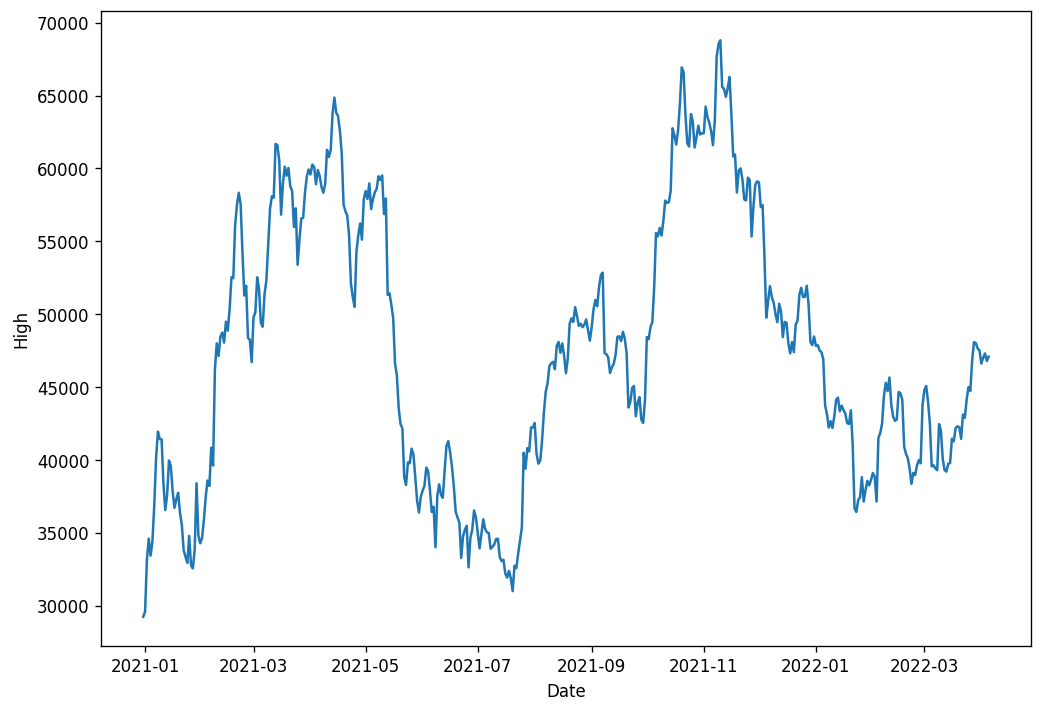

In [117]:
fig = sns.lineplot(data=btc, x='Date', y='High')
plt.show(fig)

In [118]:
from statsmodels.tsa.stattools import adfuller, kpss

In [119]:
# ADF Test
result = adfuller(btc['Close'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.5436828110281464
p-value: 0.10520426024889773
Critical Values:
   1%, -3.44464601455782
Critical Values:
   5%, -2.867843681679954
Critical Values:
   10%, -2.570127622873346


In [120]:
result = adfuller(btc['Volume'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.204887780655937
p-value: 0.01970349282666335
Critical Values:
   1%, -3.444836032925901
Critical Values:
   5%, -2.8679272692747415
Critical Values:
   10%, -2.5701721745036776


Apart from Volume (which appears to be stationnary)... ADF test tends to show BTC Closing Price time series  is not stationary !

C:\Users\olivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


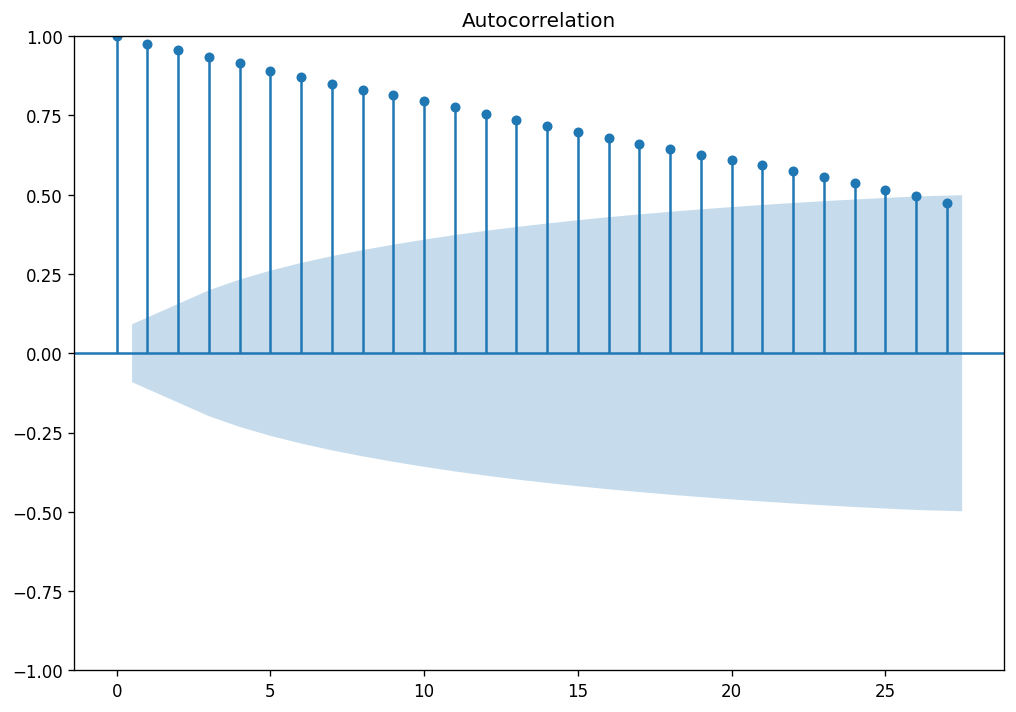

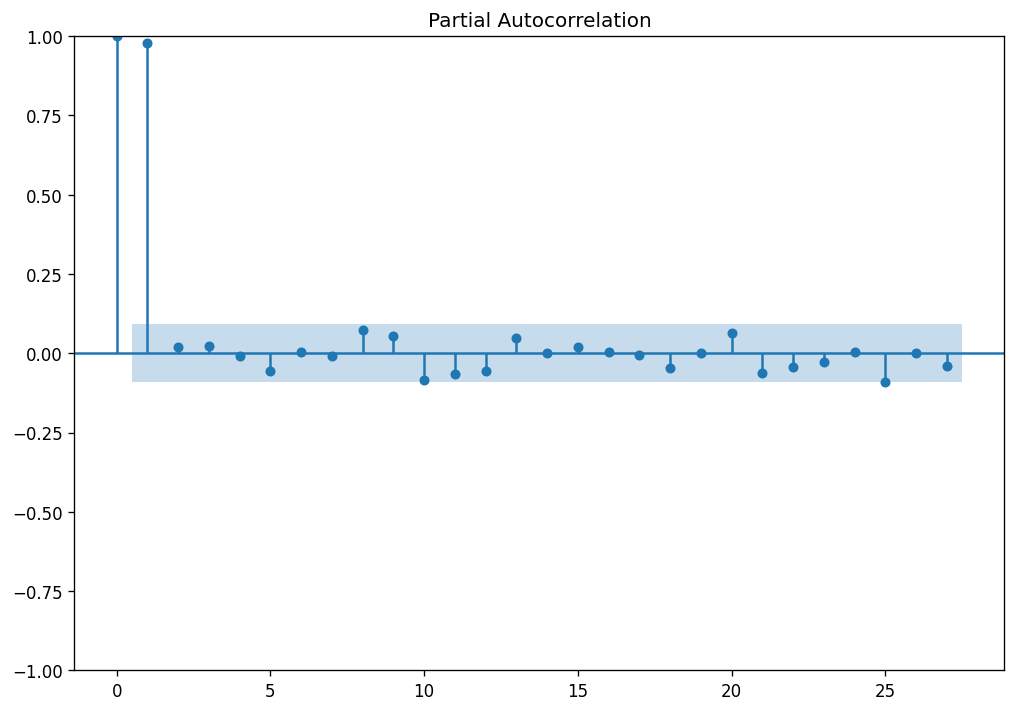

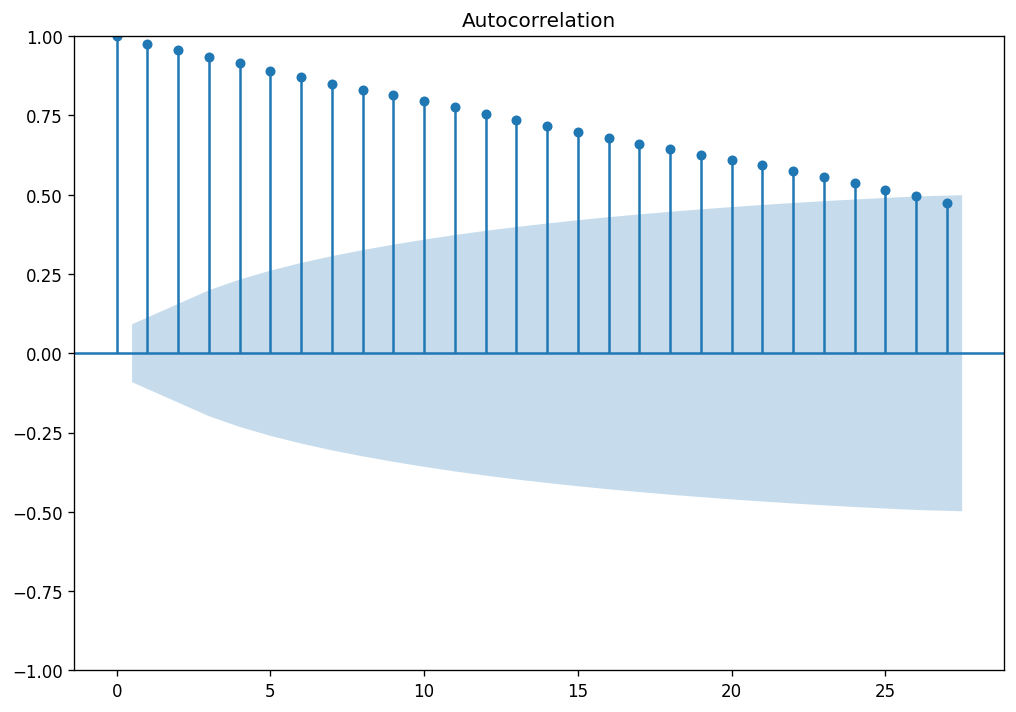

In [121]:
#Let's check fro autocorrelation !
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(btc['Close'])
plot_acf(btc['Close'])

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose


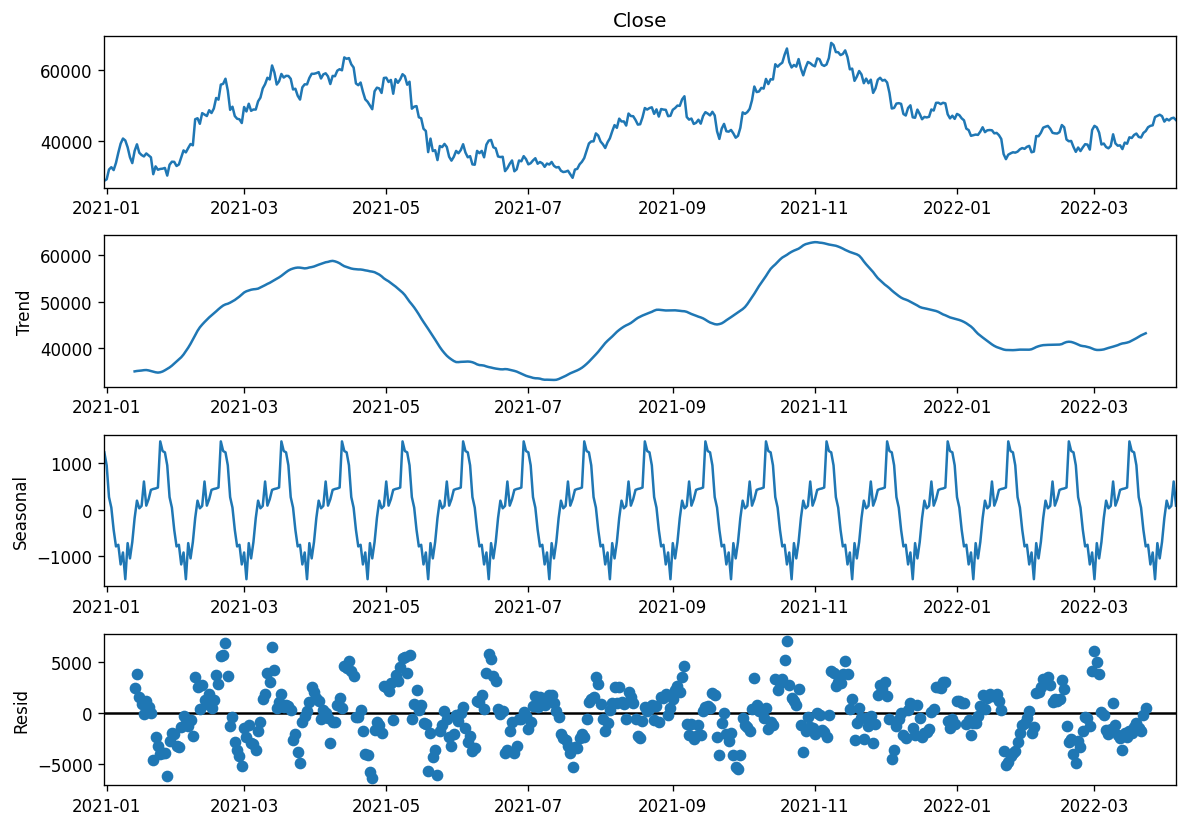

In [123]:
result_add = seasonal_decompose(btc['Close'], model='additive', period=26)
decompose = result_add.plot()

plt.show()

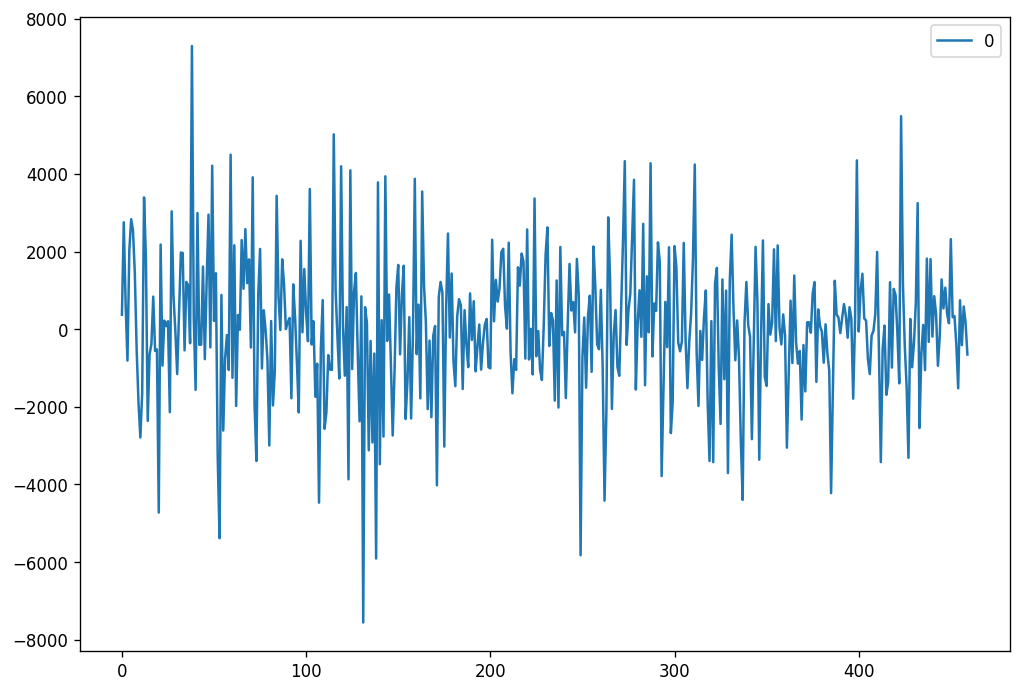

In [124]:
#Let's try and make this dataset stationnary

import numpy as np
import matplotlib.pyplot as plt

diff_btc = pd.DataFrame(np.diff(btc['Close'], n=1))

diff_btc.plot()
plt.show()

In [125]:
# ADF Test
result = adfuller(diff_btc.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -22.070170859567767
p-value: 0.0
Critical Values:
   1%, -3.4446773373329576
Critical Values:
   5%, -2.8678574606780654
Critical Values:
   10%, -2.5701349669405404


 - Implement AR and MA models.

In [126]:
#MA1

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(diff_btc, order=(0,0,1))
resultma1 = model.fit()
print(resultma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  460
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4102.972
Date:                Tue, 05 Apr 2022   AIC                           8211.944
Time:                        23:03:33   BIC                           8224.338
Sample:                             0   HQIC                          8216.825
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8877     83.248      0.443      0.658    -126.276     200.051
ma.L1         -0.0323      0.052     -0.620      0.536      -0.134       0.070
sigma2      3.282e+06   1.63e+05     20.142      0.0

In [127]:
#MA2

model = ARIMA(diff_btc, order=(0,0,2))
resultma2 = model.fit()
print(resultma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  460
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -4102.967
Date:                Tue, 05 Apr 2022   AIC                           8213.934
Time:                        23:03:34   BIC                           8230.459
Sample:                             0   HQIC                          8220.441
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8877     82.705      0.446      0.656    -125.211     198.986
ma.L1         -0.0321      0.052     -0.619      0.536      -0.134       0.070
ma.L2         -0.0044      0.047     -0.093      0.9

In [128]:
#AR2

model = ARIMA(diff_btc, order=(2,0,0))
resultar2 = model.fit()
print(resultar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  460
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -4102.965
Date:                Tue, 05 Apr 2022   AIC                           8213.929
Time:                        23:03:35   BIC                           8230.454
Sample:                             0   HQIC                          8220.436
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8877     82.811      0.445      0.656    -125.419     199.195
ar.L1         -0.0321      0.052     -0.619      0.536      -0.134       0.070
ar.L2         -0.0063      0.048     -0.131      0.8

In [129]:
import warnings
from pandas import Series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [130]:
arma22 = ARIMA(diff_btc, order = (2,0,2))
resultarma22 = arma22.fit()
print(resultarma22.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  460
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4103.016
Date:                Tue, 05 Apr 2022   AIC                           8218.033
Time:                        23:03:36   BIC                           8242.820
Sample:                             0   HQIC                          8227.793
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8877     83.794      0.440      0.660    -127.345     201.120
ar.L1          0.1281      8.620      0.015      0.988     -16.767      17.023
ar.L2          0.2768      3.058      0.091      0.9

In [131]:
#ARIMA212

arima212 = ARIMA(diff_btc, order = (2,1,2))
resultarima212 = arima212.fit()
print(resultarima212.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  460
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4097.344
Date:                Tue, 05 Apr 2022   AIC                           8204.688
Time:                        23:03:38   BIC                           8225.333
Sample:                             0   HQIC                          8212.818
                                - 460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0307     26.565     -0.039      0.969     -53.098      51.036
ar.L2         -0.0308      0.824     -0.037      0.970      -1.646       1.584
ma.L1      -3.008e-05     26.583  -1.13e-06      1.0

In [132]:
btc.shape

(461, 6)

In [133]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344


In [134]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [resultma1,resultma2, resultar2,resultarma22,resultarima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = diff_btc, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = btc['Close'][:460], y_pred = results[i].predict(), squared=False)
        rmse.append(r)
aic = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a) 

In [135]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])
summary['aic'] = aic
summary

,models_name,rmse,aic
0,MA1,1809.060298,8211.944206
1,MA2,1809.041321,8213.934001
2,AR2,1809.034621,8213.929260
3,ARMA,1809.235070,8218.032689
4,ARIMA,46939.415317,8204.687559


- What are the models with the best performance?

AR2 seems to have a slightly lower RMSE !

 - Create the function that allows to implement ARMA model, evaluate the result and choose one model with the best performance.


In [137]:
import pmdarima as pm
model = pm.arima.auto_arima(btc.Close, trace = True, error_action='ignore', suppress_warnings=True, seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8239.774, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11230.729, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10623.470, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8238.803, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8237.074, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8238.368, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8231.977, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9215.418, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8230.314, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9723.620, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8232.101, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8233

In [138]:
model.fit(btc['Close'])


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  461
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -4112.157
Date:                Tue, 05 Apr 2022   AIC                           8230.314
Time:                        23:09:36   BIC                           8242.715
Sample:                             0   HQIC                          8235.197
                                - 461                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1112.4981    358.411      3.104      0.002     410.026    1814.970
ar.L1          0.9755      0.008    121.856      0.000       0.960       0.991
sigma2       3.23e+06      0.058   5.58e+07      0.000    3.23e+06    3.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                40.58
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+24. Standard errors may be unstable.
"""

 - Make the forecast for the 5 periods
 

In [140]:
forecast = model.predict(n_periods = 5)
forecast = pd.DataFrame(forecast, columns = ['Prediction'])
forecast.set_index(pd.date_range(start = btc.iloc[-1].name.date() + pd.DateOffset(1), end = btc.iloc[-1].name.date() + pd.DateOffset(5)), inplace = True)
forecast

,Prediction
2022-04-06,45954.819947
2022-04-07,45939.932280
2022-04-08,45925.409844
2022-04-09,45911.243679
2022-04-10,45897.425046


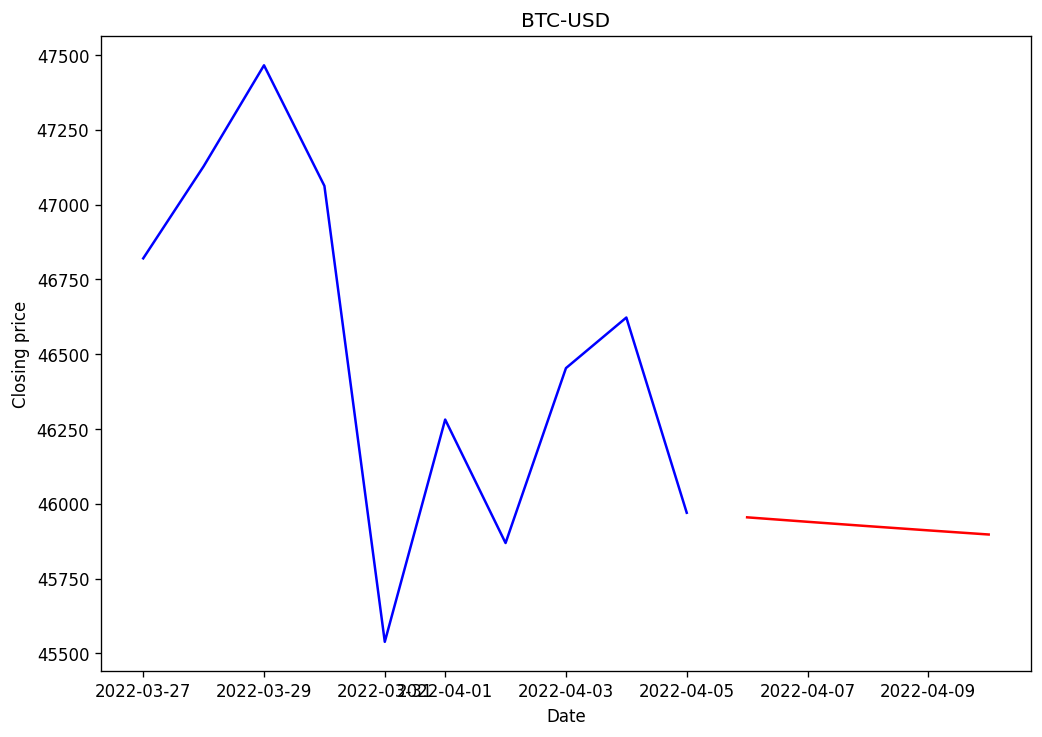

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111)
btc_zoom = btc.tail(10)
sns.lineplot(x = btc_zoom.index, y='Close', data = btc_zoom, ax = ax, color = "blue")
sns.lineplot(x = forecast.index , y = 'Prediction', data = forecast, ax = ax, color = "red")
ax.set_title('BTC-USD')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price')
plt.show()

- Make the conclusion :Make business conclusion answering the question, if I should buy Bitcoins

In [ ]:
#Conclusion: the BTC closing price trend forecasted for the newt few days is slightly downward... which means i should wait before buying ! 